In [4]:
import numpy as np
import pandas as pd
import akshare as ak
from matplotlib import pyplot as plt

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

np.random.seed(123)

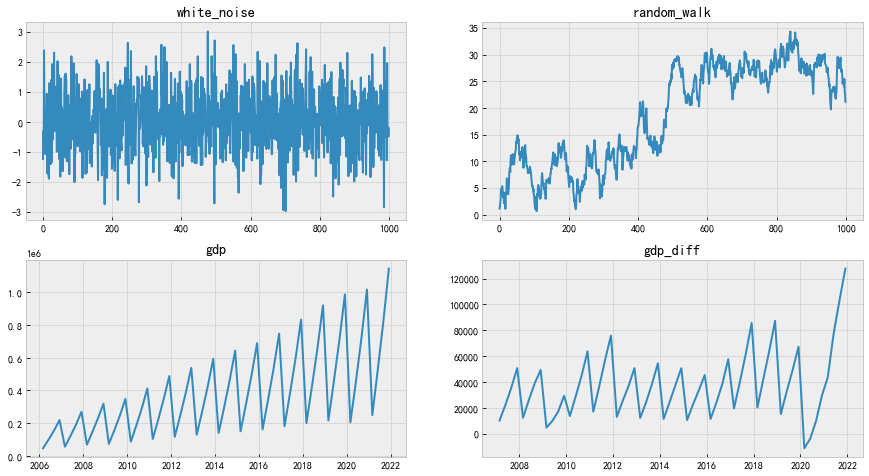

In [10]:
# -------------- 准备数据 --------------
# 白噪声
white_noise = np.random.standard_normal(size=1000)

# 随机游走
x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

# GDP
df = ak.macro_china_gdp()
df = df.set_index('季度')
df.index = pd.to_datetime(df.index)
gdp = df['国内生产总值-绝对值'][::-1].astype('float')

# GDP DIFF
gdp_diff = gdp.diff(4).dropna()


# -------------- 绘制图形 --------------
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

ax[0][0].plot(white_noise)
ax[0][0].set_title('white_noise')
ax[0][1].plot(random_walk)
ax[0][1].set_title('random_walk')

ax[1][0].plot(gdp)
ax[1][0].set_title('gdp')
ax[1][1].plot(gdp_diff)
ax[1][1].set_title('gdp_diff')

plt.show()



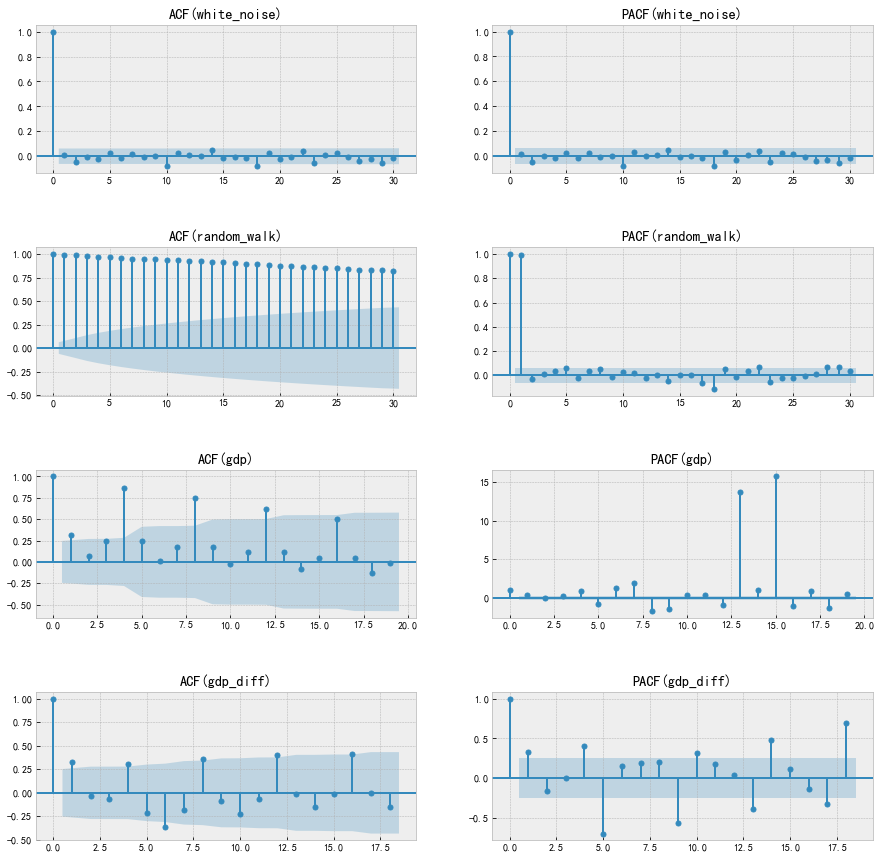

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

plot_acf(white_noise, ax=ax[0][0])
ax[0][0].set_title('ACF(white_noise)')
plot_pacf(white_noise, ax=ax[0][1])
ax[0][1].set_title('PACF(white_noise)')

plot_acf(random_walk, ax=ax[1][0])
ax[1][0].set_title('ACF(random_walk)')
plot_pacf(random_walk, ax=ax[1][1])
ax[1][1].set_title('PACF(random_walk)')

plot_acf(gdp, ax=ax[2][0])
ax[2][0].set_title('ACF(gdp)')
plot_pacf(gdp, ax=ax[2][1])
ax[2][1].set_title('PACF(gdp)')

plot_acf(gdp_diff, ax=ax[3][0])
ax[3][0].set_title('ACF(gdp_diff)')
plot_pacf(gdp_diff, ax=ax[3][1])
ax[3][1].set_title('PACF(gdp_diff)')

plt.show()

In [13]:
import numpy as np

np.random.seed(123)

white_noise = np.random.standard_normal(size=1000)

x = np.random.standard_normal(size=1000)
random_walk = np.cumsum(x)

def describe(X):
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))

print('white noise sample')
describe(white_noise)

print('random walk sample')
describe(random_walk)

white noise sample
mean1=-0.038644, mean2=-0.040484
variance1=1.006416, variance2=0.996734
random walk sample
mean1=5.506570, mean2=8.490356
variance1=53.911003, variance2=126.866920


In [14]:
import pandas as pd
import akshare as ak

df = ak.stock_zh_a_hist(symbol="000858", start_date="20211008", end_date='20211018')
df = df.set_index('日期')
df.index = pd.to_datetime(df.index)
df = df[['收盘']]

df['SMA_3'] = df['收盘'].rolling(window=3).mean()
df['SMA_5'] = df['收盘'].rolling(window=5).mean()

print(df)

                收盘       SMA_3    SMA_5
日期                                     
2021-10-08  228.22         NaN      NaN
2021-10-11  227.80         NaN      NaN
2021-10-12  229.34  228.453333      NaN
2021-10-13  239.49  232.210000      NaN
2021-10-14  240.00  236.276667  232.970
2021-10-15  234.32  237.936667  234.190
2021-10-18  215.32  229.880000  231.694


In [15]:
import numpy as np
import pandas as pd
import akshare as ak

df = ak.stock_zh_a_hist(symbol="000858", start_date="20211008", end_date='20211018')
df = df.set_index('日期')
df.index = pd.to_datetime(df.index)
df = df[['收盘']]

def WMA(close, n):
    weights = np.array(range(1, n+1))
    sum_weights = np.sum(weights)

    res = close.rolling(window=n).apply(lambda x: np.sum(weights*x) / sum_weights, raw=False)
    return res

df['WMA_3'] = WMA(df['收盘'], 3)
df['WMA_5'] = WMA(df['收盘'], 5)

print(df)

                收盘       WMA_3   WMA_5
日期                                    
2021-10-08  228.22         NaN     NaN
2021-10-11  227.80         NaN     NaN
2021-10-12  229.34  228.640000     NaN
2021-10-13  239.49  234.158333     NaN
2021-10-14  240.00  238.053333  235.32
2021-10-15  234.32  237.075000  235.77
2021-10-18  215.32  225.766667  229.48


In [16]:
import pandas as pd
import akshare as ak

df = ak.stock_zh_a_hist(symbol="000858", start_date="20211008", end_date='20211018')
df = df.set_index('日期')
df.index = pd.to_datetime(df.index)
df = df[['收盘']]

df['SMA_3'] = df['收盘'].rolling(window=3).mean()
df['EMA_3'] = df['收盘'].ewm(span=3,min_periods=3).mean()
df['EMA_5'] = df['收盘'].ewm(span=5,min_periods=5).mean()

print(df)

                收盘       SMA_3       EMA_3       EMA_5
日期                                                    
2021-10-08  228.22         NaN         NaN         NaN
2021-10-11  227.80         NaN         NaN         NaN
2021-10-12  229.34  228.453333  228.740000         NaN
2021-10-13  239.49  232.210000  234.473333         NaN
2021-10-14  240.00  236.276667  237.325806  235.769763
2021-10-15  234.32  237.936667  235.799048  235.240000
2021-10-18  215.32  229.880000  225.478898  228.187217
